# **Incêndios florestais no Brasil** <p>
Os incêndios florestais são um grave problema para a preservação das Florestas Tropicais. Compreender a frequência de incêndios florestais em uma série temporal pode ajudar a tomar medidas para evitá-los.
O Brasil tem a maior floresta tropical do planeta que é a floresta amazônica.

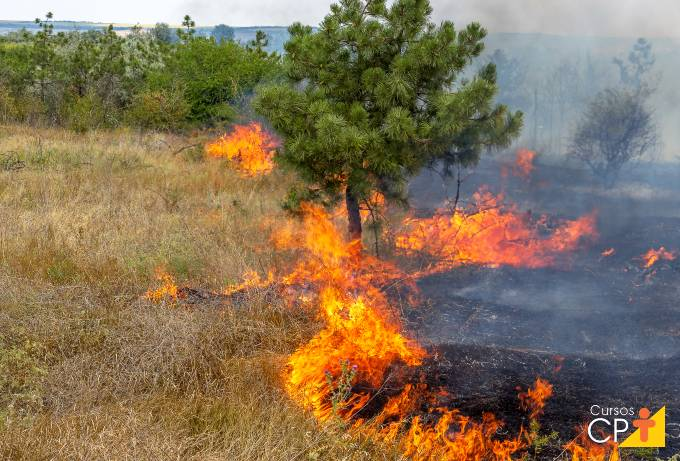

# **Base de Dados**
[Link do Download](https://drive.google.com/file/d/16PCjsLZuxmvxa0LlnTzCELbLVQhO37vN/view?usp=sharing)

In [16]:
# Libs Necessárias

# Libs para Modelagem e Matrizes
import numpy as np
import pandas as pd

# Libs para análises gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')

In [26]:
base_dados = pd.read_csv(r'C:\Users\Joao Paulo\OneDrive\Documents\Python_para_Analise_de_Dados_Data_Viking\Dados_Incendio.csv', encoding='latin-1', sep=',')
base_dados.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [27]:
# Verificando campos nulos
base_dados.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

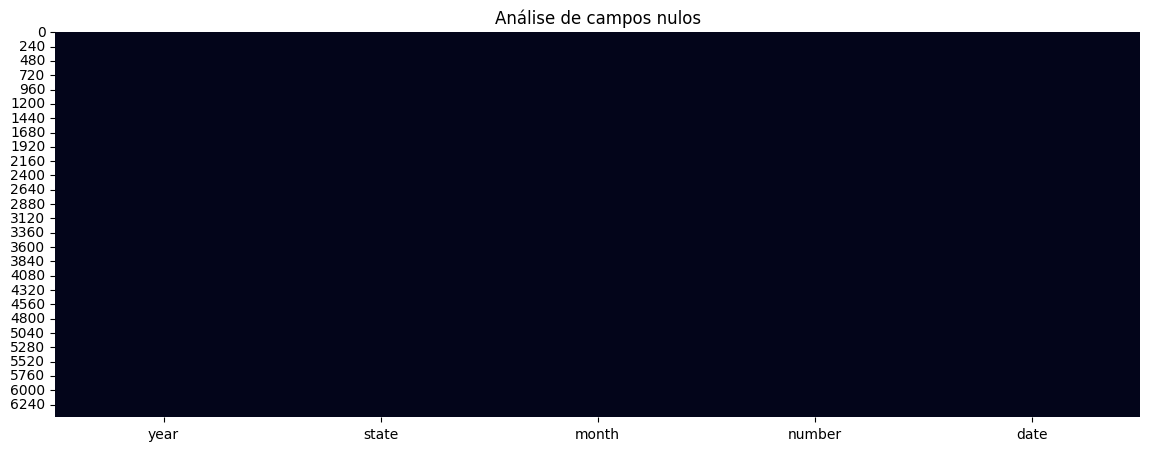

In [28]:
# Verificando campos nulos (plot)
plt.figure(figsize=(14,5))
plt.title('Análise de campos nulos')
sns.heatmap(base_dados.isnull(), cbar=False);

In [29]:
base_dados.shape

(6454, 5)

In [30]:
# Estatísticas
base_dados.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [31]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [32]:
base_dados.nunique()

year        20
state       23
month       12
number    1479
date        20
dtype: int64

In [33]:
base_dados['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [41]:
base_dados['year'] = base_dados['year'].astype(int)

## Analisando a base:

Text(0, 0.5, 'Período')

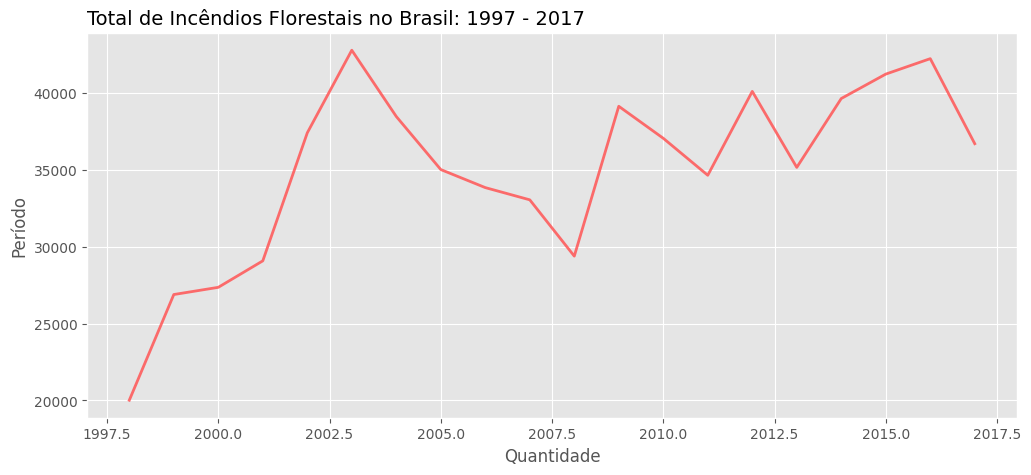

In [44]:
# Análise por ano dos incêndios
analise = base_dados.groupby(by=['year'])['number'].sum().reset_index()

# Tamanho
plt.figure(figsize=(12,5))

# Estilo
plt.style.use('ggplot')

# Gráfico
plt.title('Total de Incêndios Florestais no Brasil: 1997 - 2017', loc='left', fontsize=14)
sns.lineplot(data=analise, x='year', y='number', estimator='sum', lw=2, color='#ff5555', alpha=0.85)

# Labels
plt.xlabel('Quantidade')
plt.ylabel('Período')

In [43]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']